# JupyterLite
## In short:
* Allows users to write and run Python using their browser - no need for a local install
* Uses Pyodide to use your browser to run Python
* No server connection, it loads, and then everything else is done by your browser
* All computing and storage is done by your browser, locally - once loaded you could turn the internet off
* Simple to share code used to do analyses
* Free!

## In long
JupyterLite uses something called Pyodide to run Python using your browser. Note, 'using' the browser, not just 'in' the browser like cloud based coding platforms such as Replit and Codespaces. In essence, once Pyodide is loaded in your browser, it can then run Python using your browser's resources, through something called a 'web-worker', as if your browser was a computer or virtual machine. Importantly, once Pyodide is loaded, there is no connection between your browser and a server, meaning that data doesn't go anywhere when it's used, all the processing is actually done by your own computer. Visually, although data is stored in the same programme you use to access the internet any data you use or work you do is actually stored locally in your browser's storage (in IndexDB or localStorage). The things that are coming from the internet, when you load up Pyodide, are the Python packages you, or the Pyodide programme, want to run. After this, just as if you downloaded and installed Python and relevant packages on your computer normally, it's entirely possible to use Pyodide programmes without being connected to the internet (unless obviously the programme you write would connect to the internet anyway, say to collect data from Twitter).

If we can run Python using the browser browser, why can't we write and run code using the browser? JupyterLite takes this idea and runs with it, recreating the Jupyter Notebook and Lab development environments in browser with all the key data analysis funcationality ready to go. If you have a GitHub account (free), you can copy the code to make a JupyterLite page to your own account and then, with no coding knowledge, deploy your own customizable version of the environment. What happens is that when you visit the URL associated with your GitHub account, the code to make the JupyterLite environment tells your browser how to make the environment and how to run Python using its resources, and it just... works. Importantly, the way you set this up with GitHub is via a static webpage, essentially a set of HTML files that tell your browser what to show once they're loaded, and which do different things based on what you do, the web page that builds the JupyterLite environment is never sending infomration back and forth to a server to find out what to do, it all just loads in your browser and works. The test we at D2I always use to prove this is to get people to load JupyterLite, and start coding with their internet turned off!

We have text and video guides explaining how to set up JupyterLite here: https://www.datatoinsight.org/jupyterlite-setup

# Let's look at some code

In [1]:
import piplite

await piplite.install('pandas')
await piplite.install('matplotlib')
await piplite.install('seaborn')
await piplite.install('ipywidgets')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets, interact, interact_manual, Layout

So, I said that JupyterLite doesn't need an internet connection. This IS true, however, anything that you do in Python that would need an internet connection still does, you can't access a website without an internet connection, you can't download Python packages without one either. As a result of how Notebooks work however, it's entirely possible to run the cell that installs Python packages and then turn off the internet and only run cells which don't require an internet connection. Anyway, this is just a one way conncetion, nothing is getting **sent** to a server, we are just getting the code to run these packages from a server, no different than if we clicked a download link. If you were using Python locally, you would be doing this anyway to get packages, there's nothing exceptional about the fact that it's in abrowser.

## Now let's do a little coding to show the kind of thing we can do

In [2]:
data = pd.read_csv('data/spc_pupils_ethnicity_and_language_.csv')

data = data[(data['phase_type_grouping'] == 'Total')
            & (data['la_name'] == 'East Sussex')
           & (data['ethnicity'] != 'Total')
           & (data['time_period'] > 201617)]

data['time_period'] = data['time_period'].astype('str').str[0:4].astype('float')


def plotter(ethnicity):
    info = data[data['ethnicity'] == ethnicity]
    plt.figure(constrained_layout=True)
    sns.regplot(data=info, x='time_period', y='headcount')
    plt.xticks(rotation=90)
    plt.title(ethnicity)
    plt.show()

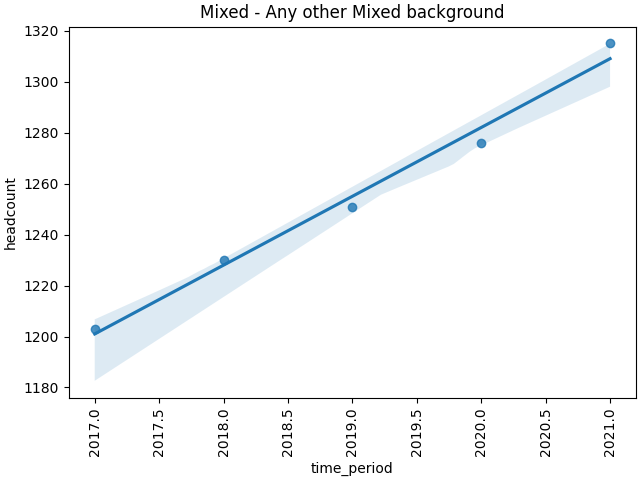

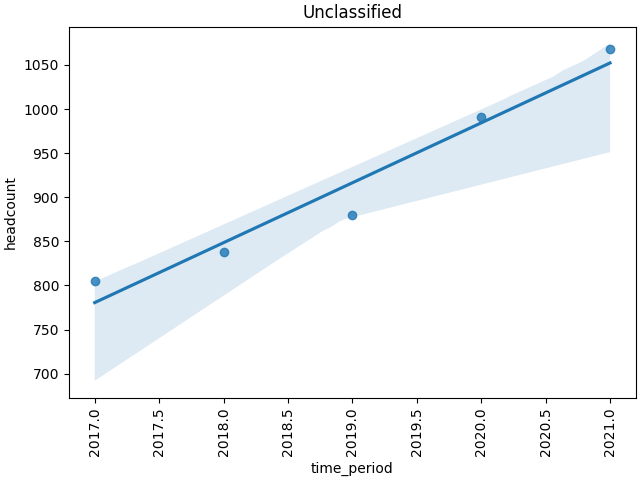

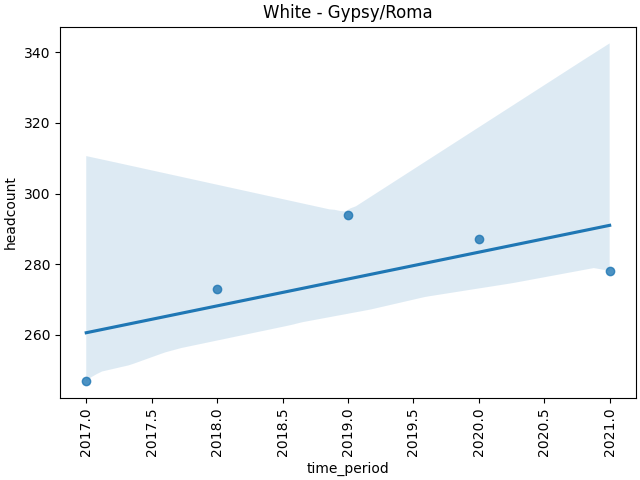

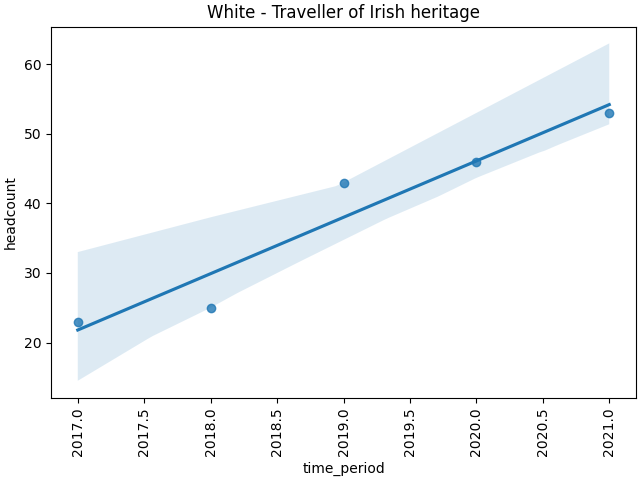

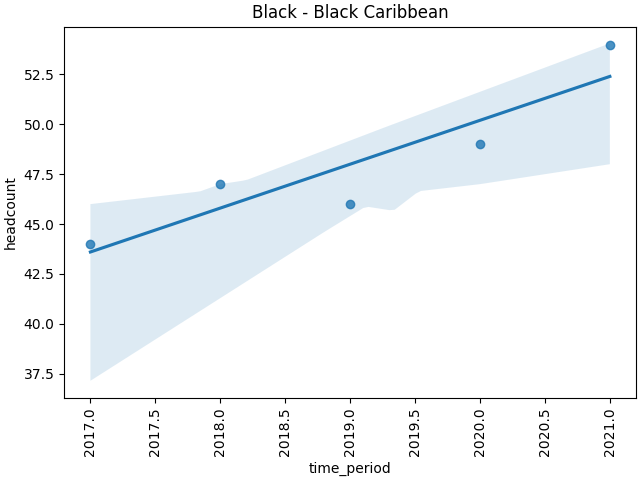

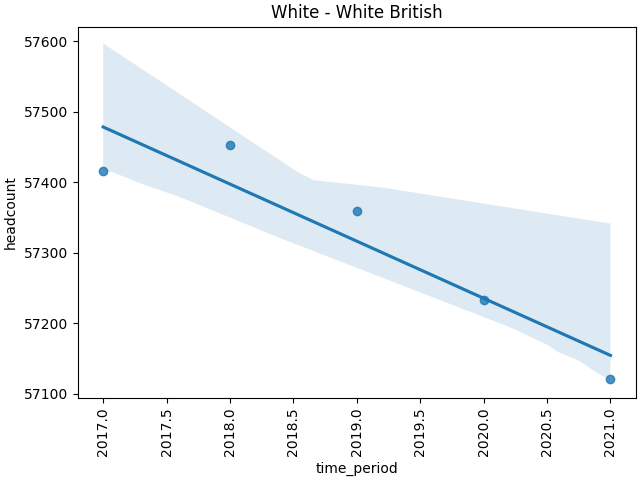

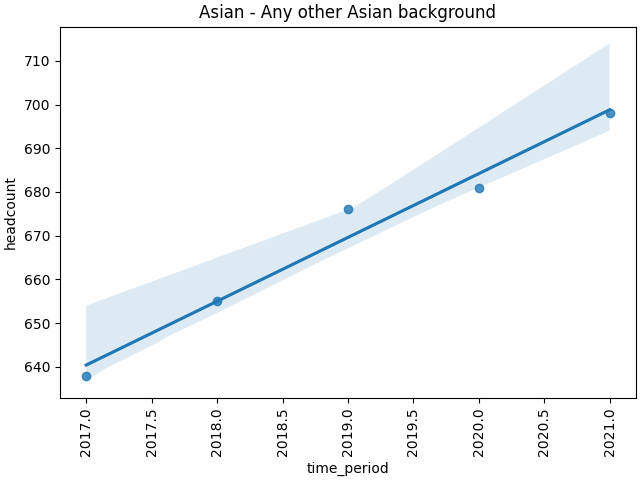

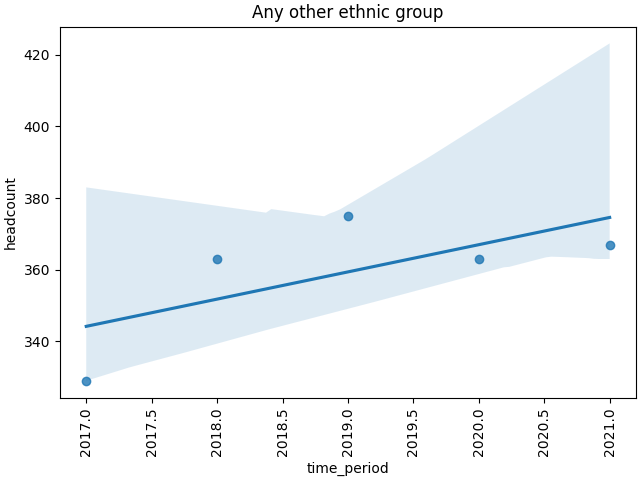

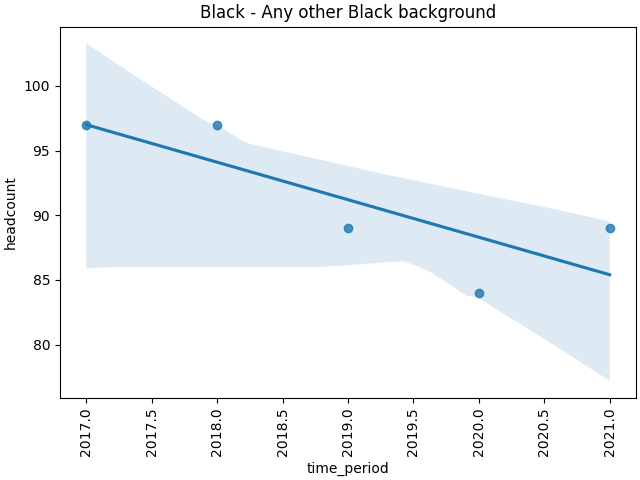

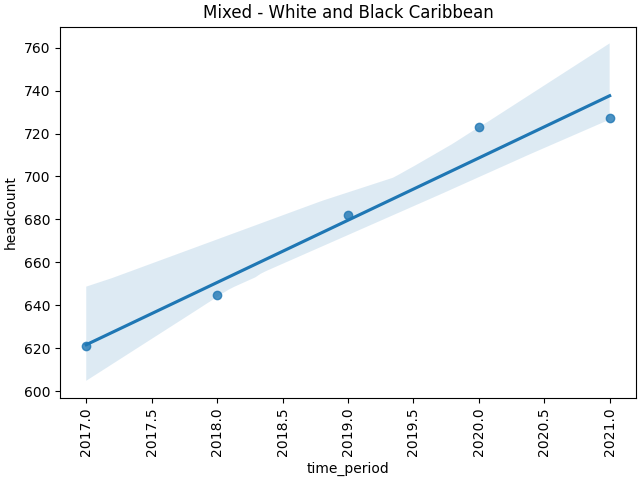

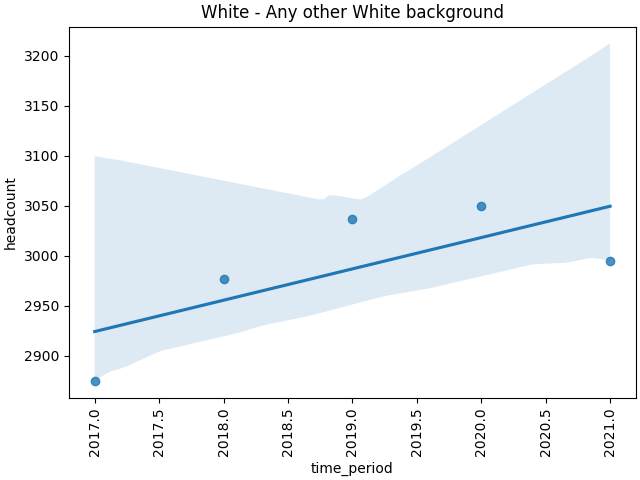

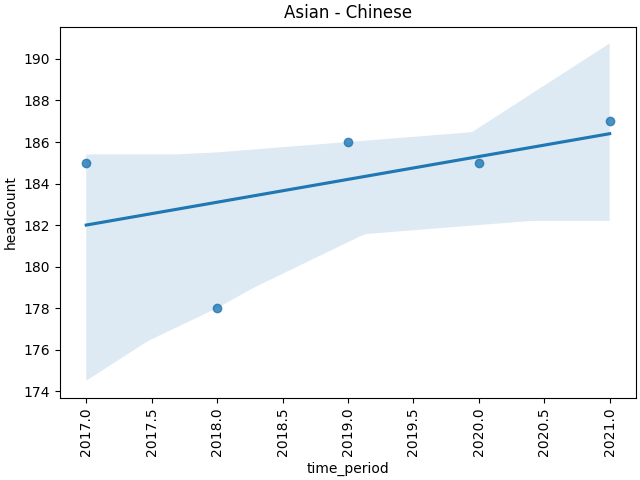

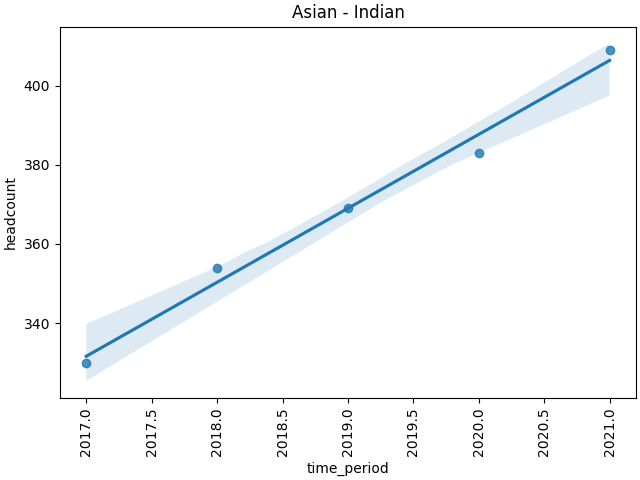

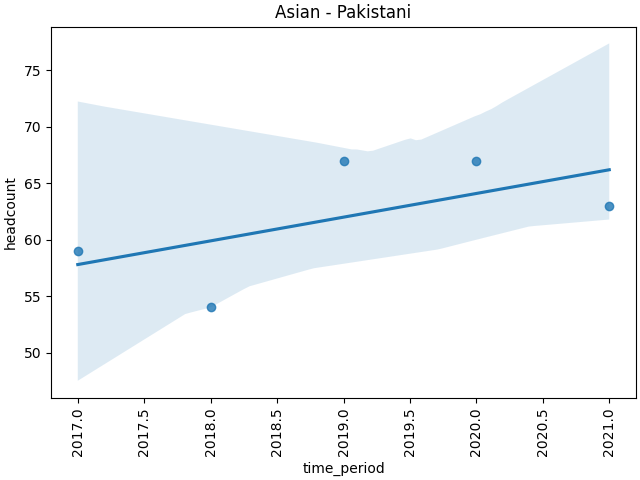

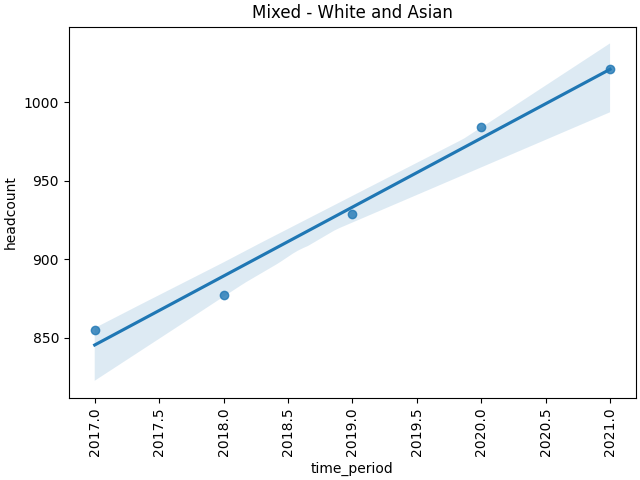

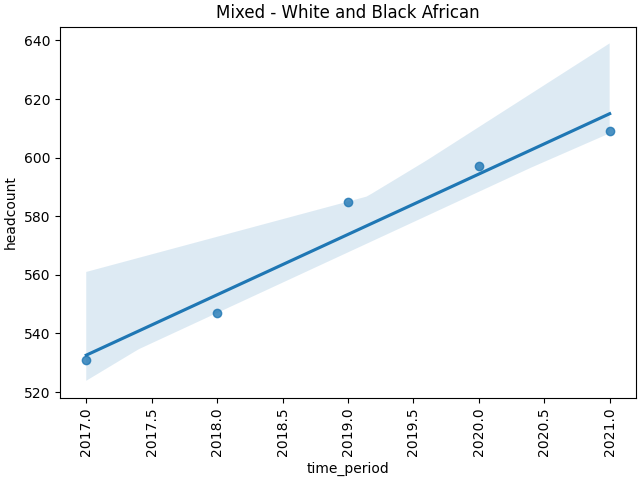

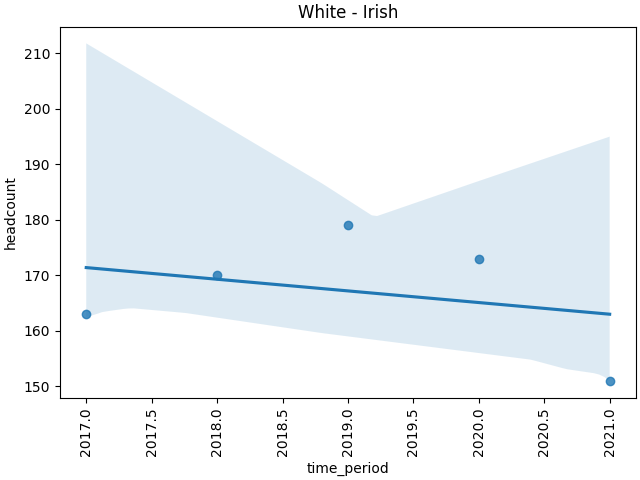

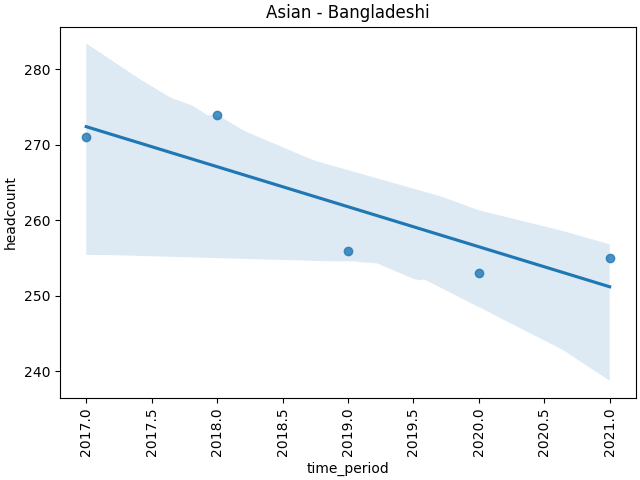

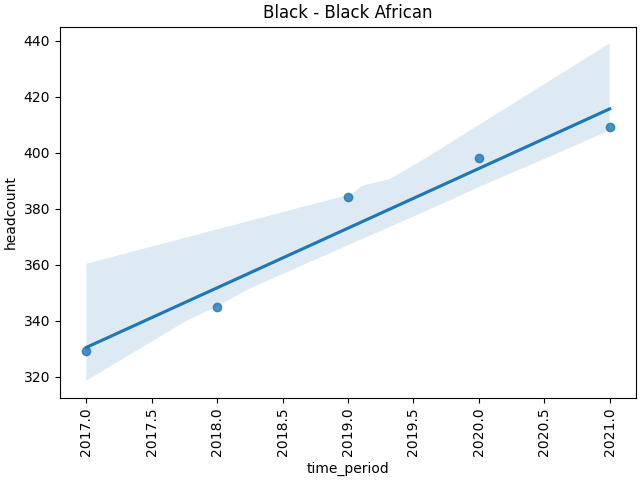

In [3]:
ethnicities = list(data['ethnicity'].unique())

for ethnicity in ethnicities:
    plotter(ethnicity)

In [4]:


def plotter2(group, years):
    info = data[(data['time_period'] >= years[0]) 
                    & (data['time_period'] <= years[1])]
    info = info[info['ethnicity'] == group]
    plt.figure(constrained_layout=True)
    sns.lmplot(data=info, x='time_period', y='headcount')
    plt.xticks(rotation=90)
    plt.title(group)
    plt.show()

year_select = widgets.IntRangeSlider(
    value = [2017, 2021],
    min = 2017,
    max = 2021,
    step = 1,
    description = 'Year Range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout = True,
    readout_format = 'd',
    layout={'width': '500px'}
    )

ethnic_select = widgets.ToggleButtons(
    options=ethnicities,
    #value=ethnicities,
    #rows=10,
    description='Ethnicties to view',
    disabled=False
)

interact(plotter2, years=year_select, group = ethnic_select)

interactive(children=(ToggleButtons(description='Ethnicties to view', options=('Mixed - Any other Mixed backgr…

<function __main__.plotter2(group, years)>

## Predictive models and more advanced use

/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


X=[[2022], [2023], [2024], [2025], [2026]], Predicted=[[68195.5]
 [68407.2]
 [68618.9]
 [68830.6]
 [69042.3]]


<ipython-input-5-49de2e5eb656>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_2 = data_2.append(pd.DataFrame({'time_period':Xnew[i],
<ipython-input-5-49de2e5eb656>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_2 = data_2.append(pd.DataFrame({'time_period':Xnew[i],
<ipython-input-5-49de2e5eb656>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_2 = data_2.append(pd.DataFrame({'time_period':Xnew[i],
<ipython-input-5-49de2e5eb656>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_2 = data_2.append(pd.DataFrame({'time_period':Xnew[i],
<ipython-input-5-49de2e5eb656>:21: FutureWarning: The frame.append method is dep

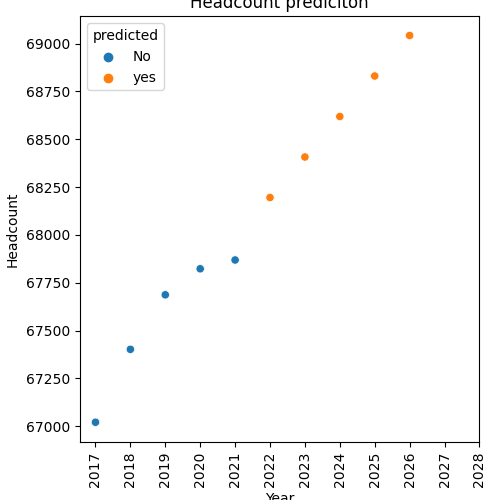

In [5]:
await piplite.install('scikit-learn')
from sklearn.linear_model import LinearRegression
data_2 = pd.read_csv('data/spc_pupils_ethnicity_and_language_.csv')
data_2 = data_2[(data_2['ethnicity'] == 'Total') 
                & (data_2['la_name'] == 'East Sussex') 
                & (data_2['phase_type_grouping'] == 'Total') 
                & (data_2['language'] == 'Total')
               & (data_2['time_period'] > 201617)]
data_2['time_period'] = data_2['time_period'].astype('str').str[0:4].astype('float')
data_2['predicted'] = 'No'

X, y = data_2[['time_period']], data_2[['headcount']]
model = LinearRegression()
model.fit(X, y)

Xnew = [[2022], [2023], [2024], [2025], [2026]]
ynew = model.predict(Xnew)

print("X=%s, Predicted=%s" % (Xnew, ynew))
for i in range(len(Xnew)):
    data_2 = data_2.append(pd.DataFrame({'time_period':Xnew[i],
                                    'headcount':ynew[i],
                                    'predicted':'yes'}))

#plt.scatter(X, y, color = 'red')
sns.scatterplot(data_2, x='time_period', y='headcount', hue='predicted')
plt.title('Headcount prediciton')
plt.xlabel('Year')
plt.ylabel('Headcount')
plt.xticks(rotation=90)
plt.xticks(range(2017, 2029, 1))
plt.show()



SciKit Learn is a machine learning model for Python, and the predicitons above were made using it. The quick example above is not the best predictive model as it's highly unlikely that the relationship between student headcount and time is purely linear, but I just wanted something to quickly show that we can even do machine leanring in JupyterLite. It's entirely possible to use sklearn fully and build large scale predictive machine learning models entirely in JupyterLite. 